In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from hsbmpy import get_max_available_L, get_file
import tensorflow as tf

In [2]:
import importlib, geneontology
from geneontology import *
importlib.reload(geneontology)
from geneontology import *

In [162]:
algorithm = 'topsbm'
directory = "/home/jovyan/work/phd/datasets/paper/gtex10seed/"
L=get_max_available_L(directory, algorithm)-1
os.chdir(directory)

In [163]:
df_Pwt = pd.read_csv("%s/%s_level_%d_word-dist.csv"%(algorithm,algorithm,L), index_col=0)

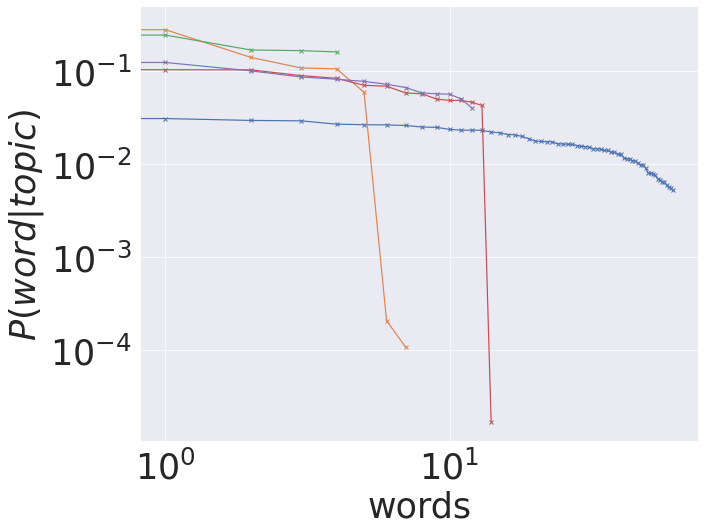

In [164]:
fig=plt.figure(figsize=(10,8))
plt.title("")
for topic in df_Pwt.columns[:5]:
    dist = df_Pwt.sort_values(by=[topic], ascending=False)[topic].astype(float)
    dist = dist[dist>1e-50].values
    if len(dist)<2:
        pass
    plt.plot(np.sort(dist[dist>0].T)[::-1], marker='x', label=topic)
plt.ylabel("$P(word | topic)$", fontsize=35)
plt.xlabel("words", fontsize=35)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(which="both",labelsize=35)
#plt.legend()
plt.show()
fig.savefig("p_w_tw_%s.pdf"%algorithm)

In [165]:
df_Ptd = pd.read_csv("%s/%s_level_%d_topic-dist.csv"%(algorithm,algorithm,L), index_col=1).drop('i_doc',1)

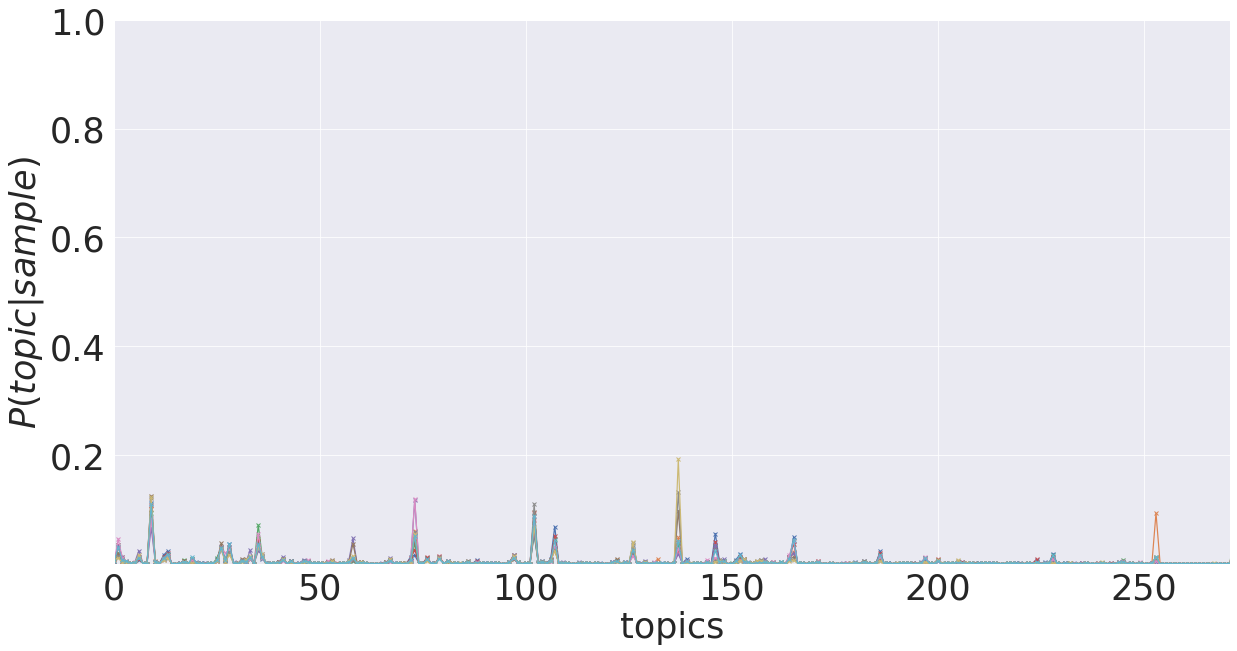

In [166]:
fig=plt.figure(figsize=(20,10))
plt.ylabel("$P(topic | sample$)", fontsize=35)
plt.xlabel("topics", fontsize=35)
for sample in df_Ptd.index.values[:10]:
    plt.plot(df_Ptd.loc[sample,:].astype(float).values, marker='x')
    #plt.plot(np.sort(df_Ptd.filter(F.col('doc')==sample[0]).drop('doc').toPandas().astype(float).values[0])[::-1], lw=0.1, marker='x')
#plt.plot(np.logspace(0,2),1/np.logspace(0,2))
#plt.xscale('log')
#plt.yscale('log')
plt.ylim(1e-4,1)
plt.xlim(0,len(df_Ptd.columns)-2)
plt.tick_params(labelsize=35)
plt.show()
fig.savefig("p_t_s_%s.pdf"%algorithm)

In [167]:
df_mt = pd.read_csv("mainTable.csv",sep=",",index_col=0)
df_mt.index = [g[:15] for g in df_mt.index]
df_files=pd.read_csv("files.dat", index_col=0)
#df_mt=df_mt.reindex(index=df_Pwt.index.values.ravel(),
#                    columns=[get_file(sample, df_files).name for sample in df_Ptd.index.values.ravel()])
df_mt.dropna(how="all", axis=0, inplace=True)
#df_mt=df_mt.applymap(lambda tpm: np.log2(tpm+1))
#df_mt=df_mt.where(df_mt<1e6,1e6)
df_mt.head()

,GTEX-1KWVE-2326-SM-D4P3N,GTEX-1H23P-0011-R6b-SM-A9G1H,GTEX-14C39-0011-R5b-SM-5ZZV1,GTEX-1H23P-2926-SM-9WYU8,GTEX-13N2G-0011-R10a-SM-5MR34,GTEX-13NZA-0011-R1b-SM-5LUAF,GTEX-1A8G6-0011-R6b-SM-7P8PE,GTEX-13S7M-0011-R9a-SM-5O9DW,GTEX-1HBPM-0011-R9b-SM-ARL7C,GTEX-1A3MX-0011-R1b-SM-7P8PH,...,GTEX-OXRK-0626-SM-2HMJ5,GTEX-R55E-0826-SM-2TC5M,GTEX-13O61-0226-SM-5KM52,GTEX-QV44-0826-SM-2S1RG,GTEX-18A7A-0826-SM-7KFTJ,GTEX-ZF29-0726-SM-DO92H,GTEX-ZXG5-0926-SM-5NQ8H,GTEX-1RMOY-0126-SM-EWRNN,GTEX-1RAZQ-0926-SM-EAZ4Q,GTEX-YB5K-0526-SM-5LUAS
ENSG00000268903,0.5180,1.229,0.9138,3.206,3.939,0.8663,0.31250,1.505,5.192,3.005,...,4.102,8.620,2.777,1.487,4.671,13.280,2.683,0.751,14.280,17.600
ENSG00000269981,0.7248,1.064,2.9150,3.927,6.852,1.0910,0.05934,1.918,6.027,1.571,...,10.050,21.330,4.556,9.445,7.929,25.290,1.560,1.730,35.450,28.950
ENSG00000225972,17.5400,42.470,11.7200,17.620,8.882,14.2500,39.18000,15.980,10.540,25.390,...,17.300,9.527,5.756,13.420,7.995,4.456,7.316,10.360,7.533,7.035
ENSG00000237973,89.8500,292.300,315.7000,154.000,33.530,198.5000,173.10000,132.700,87.340,174.600,...,108.400,13.690,83.950,52.210,43.540,53.900,13.760,53.580,42.820,80.540
ENSG00000229344,18.3500,67.950,27.1100,30.910,9.152,30.7400,48.06000,74.020,20.890,155.300,...,35.320,22.010,17.070,23.230,12.020,9.953,11.970,13.410,9.123,11.930


In [168]:
Pgt = tf.convert_to_tensor(df_Pwt.values)
Pts = tf.transpose(tf.convert_to_tensor(df_Ptd.values))
Pgs = tf.matmul(Pgt,Pts)
Ps = tf.convert_to_tensor(df_mt.sum(0).values)
Ps = tf.divide(Ps, tf.reduce_sum(Ps))#normalize
Pg = tf.squeeze(tf.matmul(Pgs, tf.reshape(Ps,[Ps.shape[0],1])))

In [169]:
print(Pgt.shape,Pts.shape,Pgs.shape,Pg.shape, Ps.shape)

(3000, 273) (273, 1000) (3000, 1000) (3000,) (1000,)


In [170]:
Pgs_data = Pgs.numpy()
Pg_data = Pg.numpy()
Pgs_data.shape

(3000, 1000)

In [171]:
df_Pgs = pd.DataFrame(data=Pgs_data, index=df_Pwt.values.T[0], columns=df_Ptd.index.values.ravel())

In [172]:
A=df_mt.fillna(0).astype(int).sum(1).values

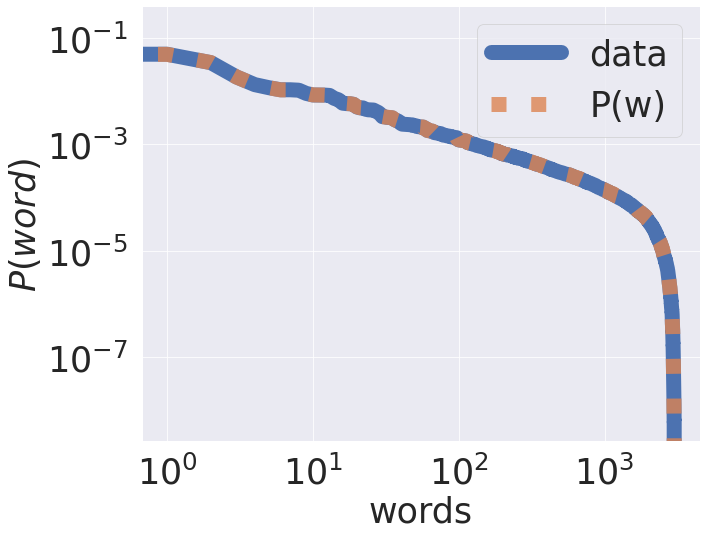

In [173]:
fig=plt.figure(figsize=(10,8))
plt.plot(np.sort(A)[::-1]/A.sum(), lw=15, ls='-', label='data')
plt.plot(np.sort(Pg_data)[::-1]/np.sum(Pg_data), alpha=0.8, lw=15, ls=':', label='P(w)')
plt.ylabel("$P(word)$", fontsize=35)
plt.xlabel("words", fontsize=35)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=35)
plt.tick_params(which="both", width=25, length=10, labelsize=35)
plt.legend(fontsize=35)
plt.show()
fig.savefig("p_w_%s.pdf"%algorithm)

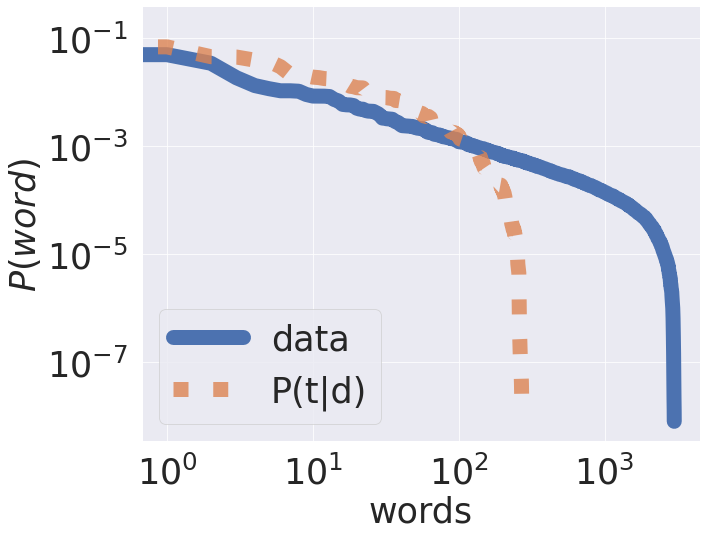

In [174]:
fig=plt.figure(figsize=(10,8))
plt.plot(np.sort(df_mt.mean(1).values)[::-1]/df_mt.mean(1).sum(), lw=15, ls='-', label='data')
plt.plot(np.sort(df_Ptd.transpose().sum(1).values)[::-1]/df_Ptd.transpose().sum(1).sum(), alpha=0.8, lw=15, ls=':', label='P(t|d)')
plt.ylabel("$P(word$)", fontsize=35)
plt.xlabel("words", fontsize=35)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=35)
plt.tick_params(which="both", width=25, length=10, labelsize=35)
plt.legend(fontsize=35)
plt.show()
fig.savefig("ptd_w_%s.pdf"%algorithm)

In [175]:
df_topics = pd.read_csv("%s/%s_level_%d_topics.csv"%(algorithm,algorithm,L), index_col=1)
f = df_mt.sum(1)/df_mt.sum().sum()
f = f.sort_values(ascending=False)

df_Ptd = pd.read_csv("%s/%s_level_%d_topic-dist.csv"%(algorithm,algorithm,L), index_col=1).drop("i_doc",1)
df_Ptd = df_Ptd.transpose()
f_t = df_Ptd.sum(1)
f_t = f_t / f_t.sum()

correlation = []

for topic in df_topics:
    f_g_value = np.mean(f[[g[:15] for g in df_topics[topic].dropna()]])
    f_t_value = f_t[topic]
    correlation.append((f_g_value,f_t_value))

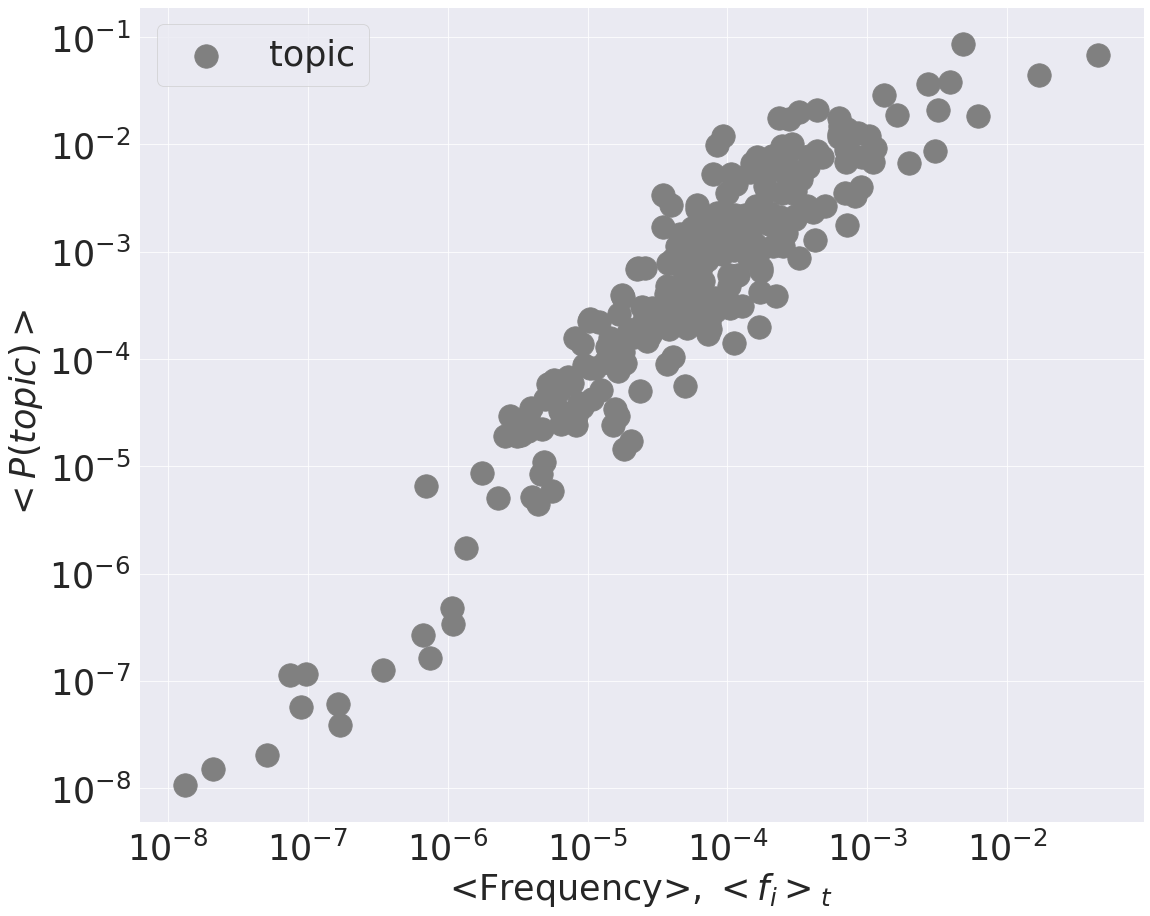

In [176]:
fig=plt.figure(figsize=(18,15))
plt.scatter(*np.array(correlation).T, color="gray", s=550, label="topic")

plt.xlabel("<Frequency>, $<f_i>_t$", fontsize=35)
plt.ylabel("$<P(topic)>$", fontsize=35)

plt.xscale("log")
plt.yscale("log")

plt.tick_params(labelsize=35)

plt.legend(fontsize=35)
plt.show()
fig.savefig("corr_f_pt_%s.pdf"%algorithm)